## IMPORT DEPENDENCIES

In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from termcolor import colored

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

import sklearn
from sklearn import metrics

## DEFINING CONSTANTS

In [3]:
#defining constants
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/Train/'
check_path = 'Datasets/Check/'

## DEFINING MODEL
We will use resnet cnn model for face recognition

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [6]:
#model details
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

## INPUT AND PREPROCESS IMAGE

In [7]:
#Load Harr classifier from opencv which is used for face classification
face_classifier  = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
def input_image(img):
    img=cv2.resize(img, (224, 224))
    img=img.reshape(1,224,224,3)
    return img

In [9]:
#function to detect faces and return cropped faces
def face_detector(image):
    face=face_classifier.detectMultiScale(image,1.3,5)
    
    #return cropped image
    for (x,y,w,h) in face:
        x=x-10
        y=y-10
        crop=image[y:y+h+50, x:x+w+50]
    return crop

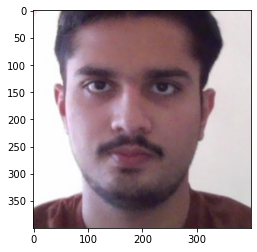

In [10]:
#REFERENCE IMAGE
img = cv2.imread(train_path+'Palash.jpg')
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.imshow(img)
palash = input_image(img)


## MODEL PREDICTION

In [11]:
#checks for wrong label given to 
actual_labels = ["PALASH"]*50 + ["NOT PALASH"]*50
test_labels = []
wrong = 0 

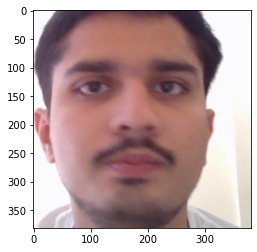

 This image match to PALASH by : 75.57 %
PALASH




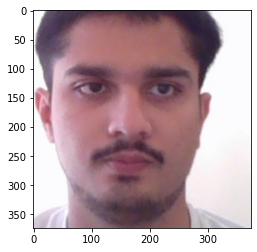

 This image match to PALASH by : 82.48 %
PALASH




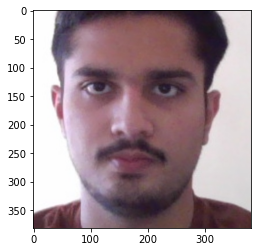

 This image match to PALASH by : 95.26 %
PALASH




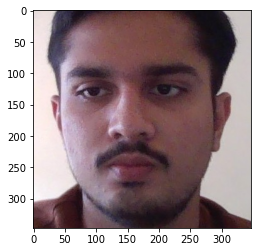

 This image match to PALASH by : 81.06 %
PALASH




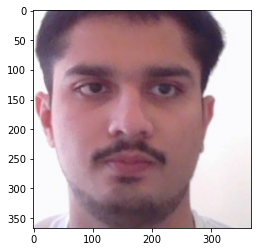

 This image match to PALASH by : 80.12 %
PALASH




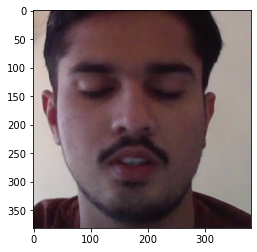

 This image match to PALASH by : 79.29 %
PALASH




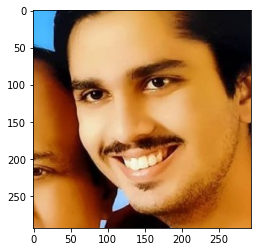

 This image match to PALASH by : 39.26 %
NOT PALASH




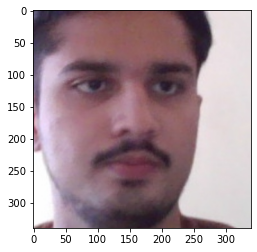

 This image match to PALASH by : 77.47 %
PALASH




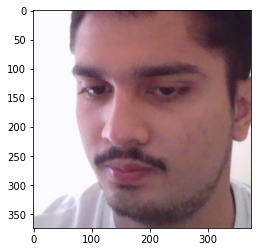

 This image match to PALASH by : 69.75 %
PALASH




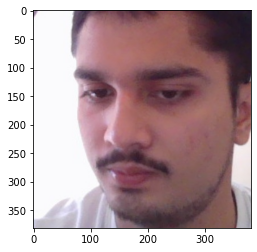

 This image match to PALASH by : 68.14 %
PALASH




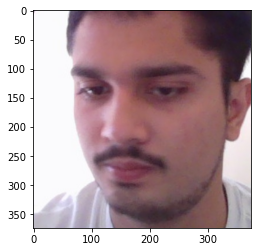

 This image match to PALASH by : 71.02 %
PALASH




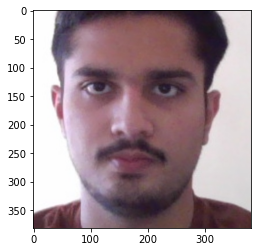

 This image match to PALASH by : 95.26 %
PALASH




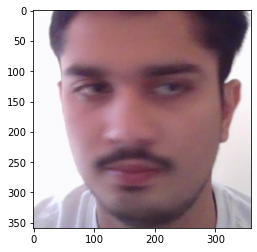

 This image match to PALASH by : 74.68 %
PALASH




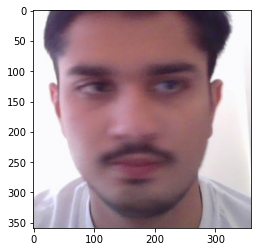

 This image match to PALASH by : 79.92 %
PALASH




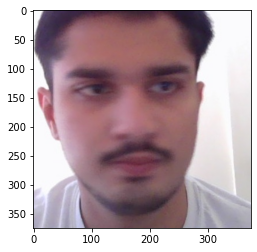

 This image match to PALASH by : 78.65 %
PALASH




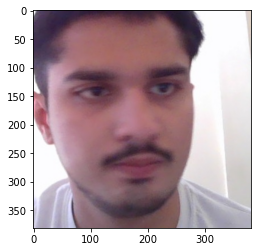

 This image match to PALASH by : 75.61 %
PALASH




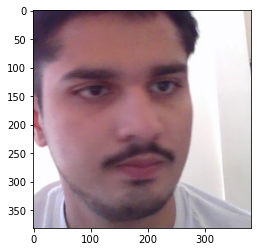

 This image match to PALASH by : 72.19 %
PALASH




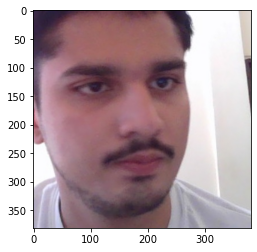

 This image match to PALASH by : 68.43 %
PALASH




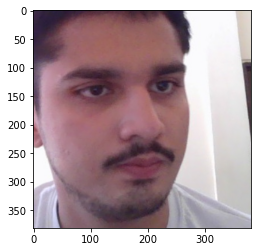

 This image match to PALASH by : 67.92 %
PALASH




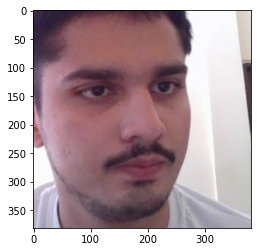

 This image match to PALASH by : 67.03 %
PALASH




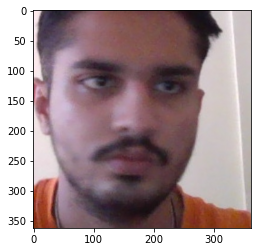

 This image match to PALASH by : 72.08 %
PALASH




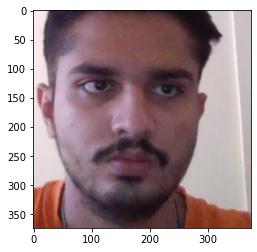

 This image match to PALASH by : 76.4 %
PALASH




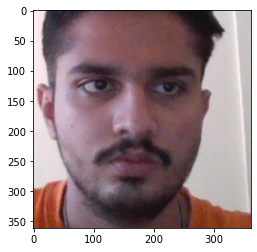

 This image match to PALASH by : 78.67 %
PALASH




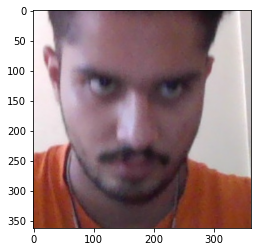

 This image match to PALASH by : 65.0 %
NOT PALASH




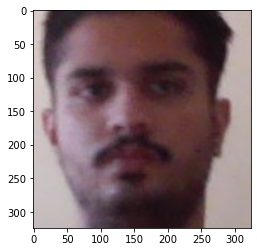

 This image match to PALASH by : 65.84 %
PALASH




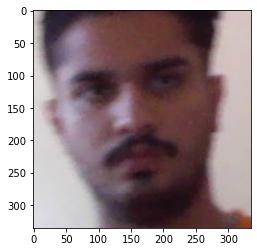

 This image match to PALASH by : 66.99 %
PALASH




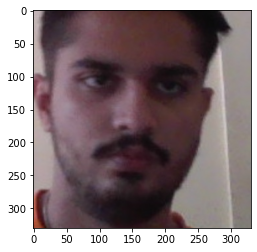

 This image match to PALASH by : 70.54 %
PALASH




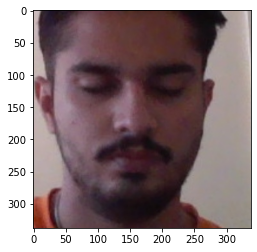

 This image match to PALASH by : 73.14 %
PALASH




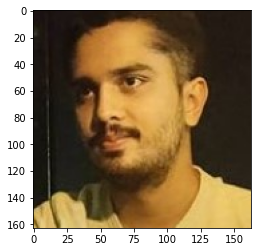

 This image match to PALASH by : 48.69 %
NOT PALASH




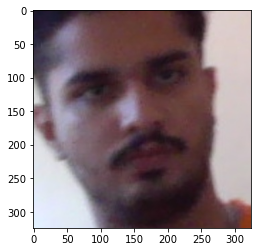

 This image match to PALASH by : 63.34 %
NOT PALASH




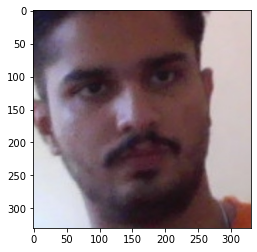

 This image match to PALASH by : 71.4 %
PALASH




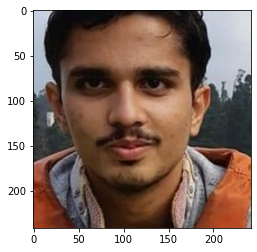

 This image match to PALASH by : 53.43 %
NOT PALASH




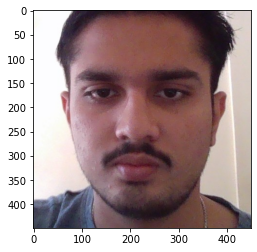

 This image match to PALASH by : 78.43 %
PALASH




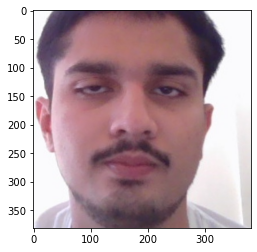

 This image match to PALASH by : 78.45 %
PALASH




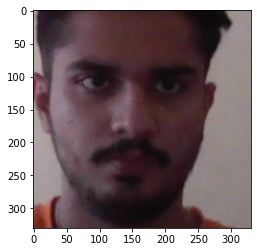

 This image match to PALASH by : 71.91 %
PALASH




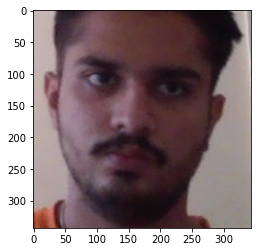

 This image match to PALASH by : 76.75 %
PALASH




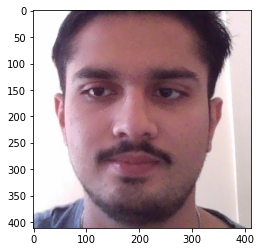

 This image match to PALASH by : 82.63 %
PALASH




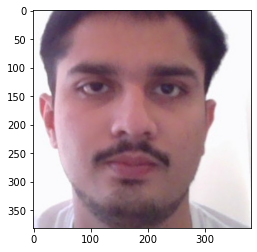

 This image match to PALASH by : 80.14 %
PALASH




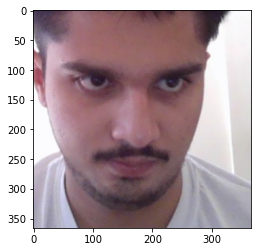

 This image match to PALASH by : 68.81 %
PALASH




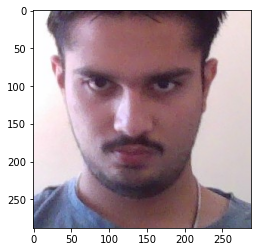

 This image match to PALASH by : 77.26 %
PALASH




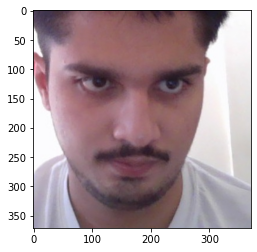

 This image match to PALASH by : 72.2 %
PALASH




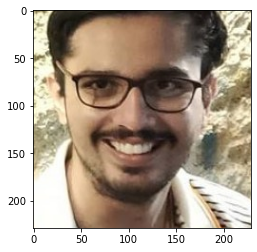

 This image match to PALASH by : 53.15 %
NOT PALASH




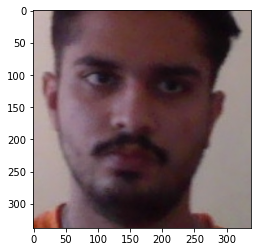

 This image match to PALASH by : 74.99 %
PALASH




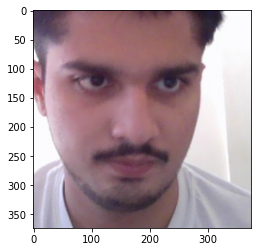

 This image match to PALASH by : 73.55 %
PALASH




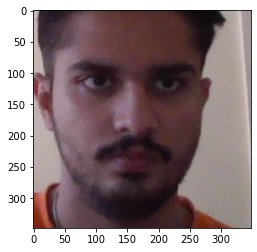

 This image match to PALASH by : 72.86 %
PALASH




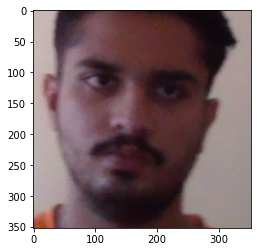

 This image match to PALASH by : 71.85 %
PALASH




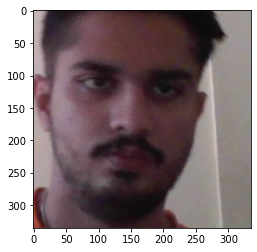

 This image match to PALASH by : 65.37 %
PALASH




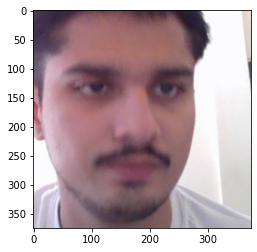

 This image match to PALASH by : 71.61 %
PALASH




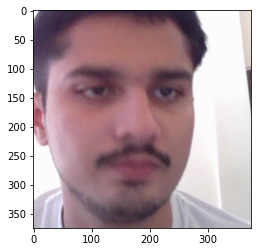

 This image match to PALASH by : 71.16 %
PALASH




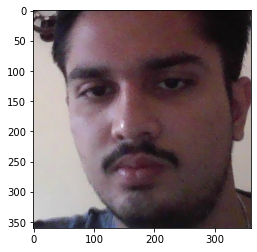

 This image match to PALASH by : 64.8 %
NOT PALASH




In [12]:
#checking for images with PALASH label
for i in range(1,51):
    path = check_path+'PALASH/'+str(i)+'.jpg'
    img  = cv2.imread(path)
    image  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img  = face_detector(image)
    plt.imshow(final_img)
    plt.show()
    x = input_image(final_img)
    
    input_result = resnet.predict(palash).reshape(1,-1)
    test_result = resnet.predict(x).reshape(1,-1)
    result = metrics.pairwise.cosine_similarity(input_result,test_result)
    
    print(" This image match to PALASH by : " + str( round( result[0][0]*100,2) ) + " %")
    if( result >= 0.65 ):
        test_labels.append("PALASH")
        print('\033[1m' + colored( "PALASH" , "green" ) + '\033[0m' + "\n\n")
    else:
        test_labels.append("NOT PALASH")
        wrong += 1
        print(colored ("NOT PALASH" , "red")+"\n\n")

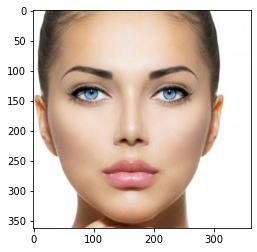

 This image match to PALASH by : 57.14 %
NOT PALASH




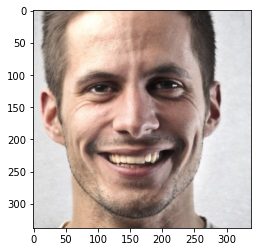

 This image match to PALASH by : 65.77 %
PALASH




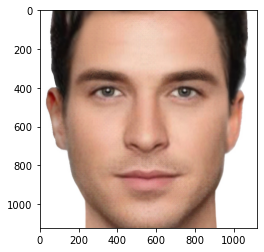

 This image match to PALASH by : 65.4 %
PALASH




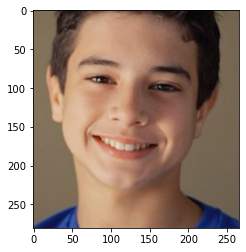

 This image match to PALASH by : 55.4 %
NOT PALASH




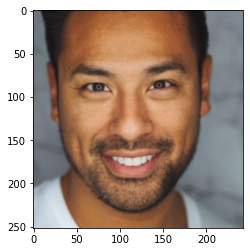

 This image match to PALASH by : 65.88 %
PALASH




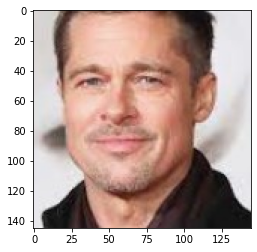

 This image match to PALASH by : 63.64 %
NOT PALASH




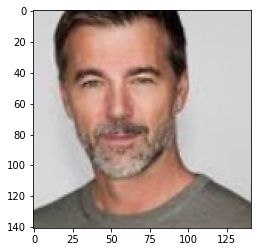

 This image match to PALASH by : 55.46 %
NOT PALASH




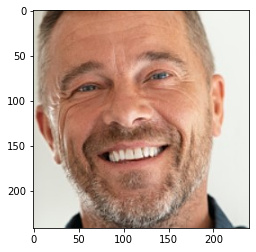

 This image match to PALASH by : 53.61 %
NOT PALASH




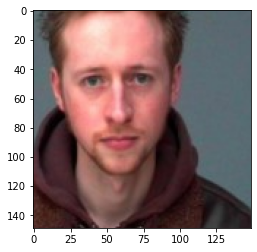

 This image match to PALASH by : 38.6 %
NOT PALASH




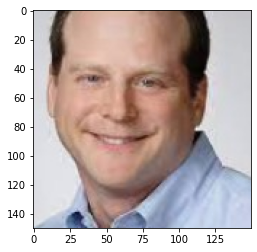

 This image match to PALASH by : 57.25 %
NOT PALASH




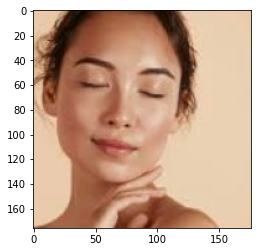

 This image match to PALASH by : 49.09 %
NOT PALASH




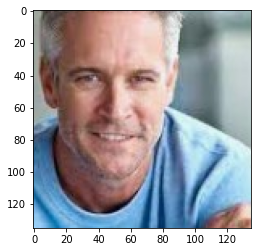

 This image match to PALASH by : 35.62 %
NOT PALASH




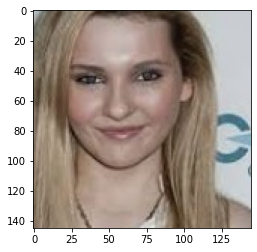

 This image match to PALASH by : 36.11 %
NOT PALASH




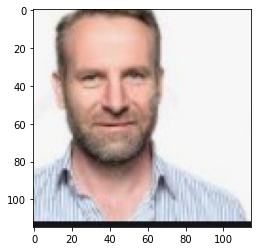

 This image match to PALASH by : 40.28 %
NOT PALASH




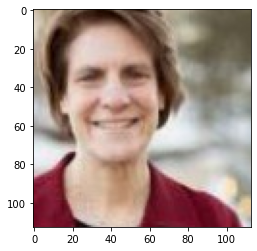

 This image match to PALASH by : 44.98 %
NOT PALASH




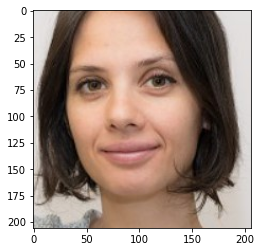

 This image match to PALASH by : 50.77 %
NOT PALASH




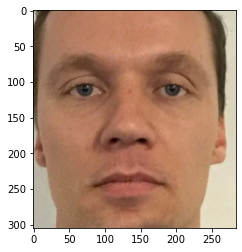

 This image match to PALASH by : 58.41 %
NOT PALASH




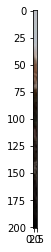

 This image match to PALASH by : 8.14 %
NOT PALASH




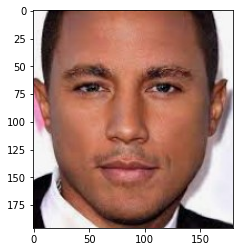

 This image match to PALASH by : 57.03 %
NOT PALASH




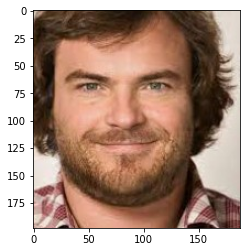

 This image match to PALASH by : 52.45 %
NOT PALASH




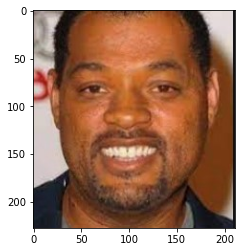

 This image match to PALASH by : 56.47 %
NOT PALASH




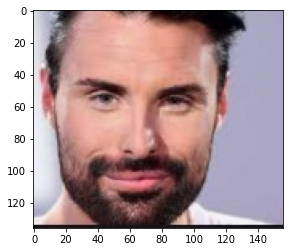

 This image match to PALASH by : 58.68 %
NOT PALASH




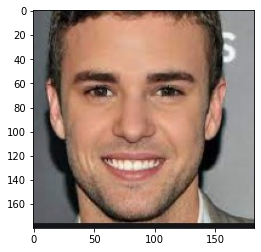

 This image match to PALASH by : 49.91 %
NOT PALASH




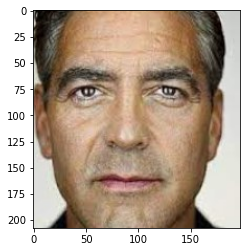

 This image match to PALASH by : 57.65 %
NOT PALASH




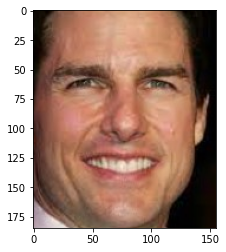

 This image match to PALASH by : 52.96 %
NOT PALASH




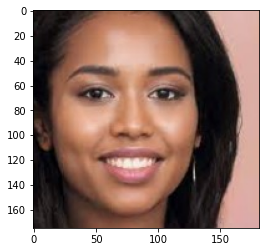

 This image match to PALASH by : 52.37 %
NOT PALASH




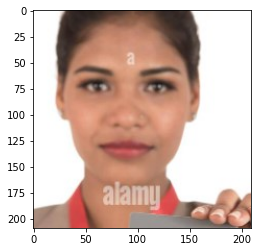

 This image match to PALASH by : 52.04 %
NOT PALASH




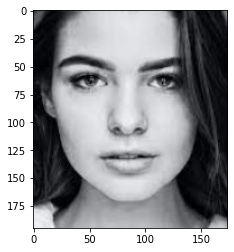

 This image match to PALASH by : 41.59 %
NOT PALASH




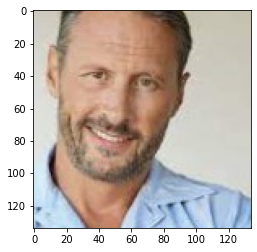

 This image match to PALASH by : 48.65 %
NOT PALASH




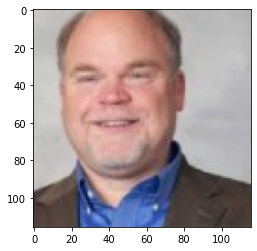

 This image match to PALASH by : 44.55 %
NOT PALASH




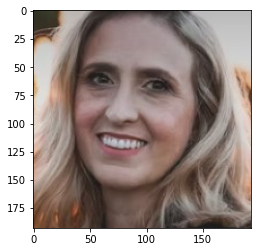

 This image match to PALASH by : 40.32 %
NOT PALASH




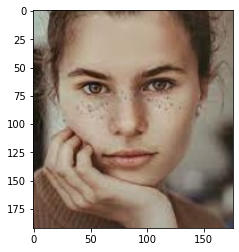

 This image match to PALASH by : 44.72 %
NOT PALASH




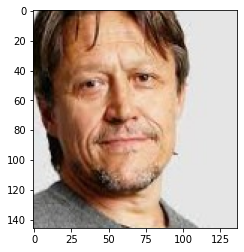

 This image match to PALASH by : 51.25 %
NOT PALASH




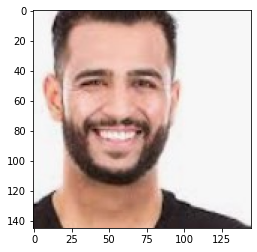

 This image match to PALASH by : 54.87 %
NOT PALASH




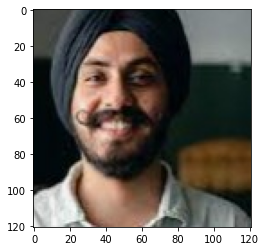

 This image match to PALASH by : 39.53 %
NOT PALASH




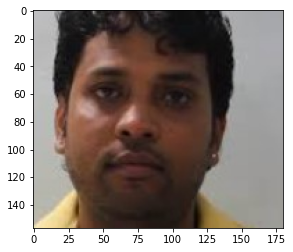

 This image match to PALASH by : 58.35 %
NOT PALASH




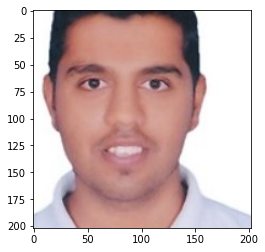

 This image match to PALASH by : 70.04 %
PALASH




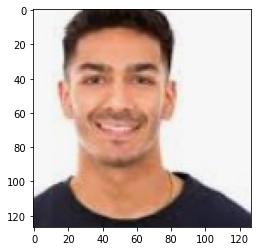

 This image match to PALASH by : 54.57 %
NOT PALASH




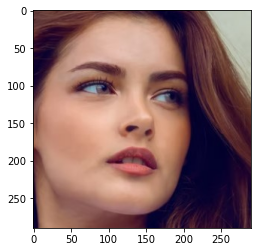

 This image match to PALASH by : 37.96 %
NOT PALASH




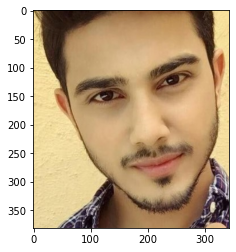

 This image match to PALASH by : 48.03 %
NOT PALASH




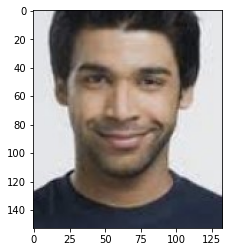

 This image match to PALASH by : 63.45 %
NOT PALASH




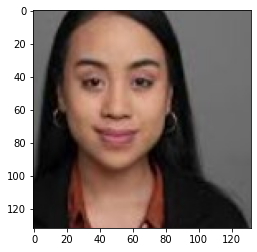

 This image match to PALASH by : 40.02 %
NOT PALASH




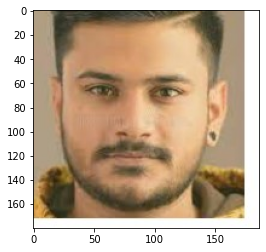

 This image match to PALASH by : 55.36 %
NOT PALASH




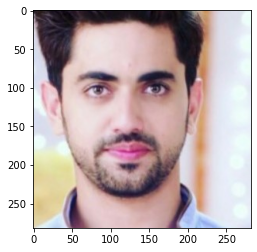

 This image match to PALASH by : 67.14 %
PALASH




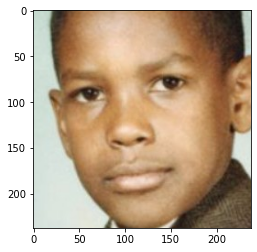

 This image match to PALASH by : 54.94 %
NOT PALASH




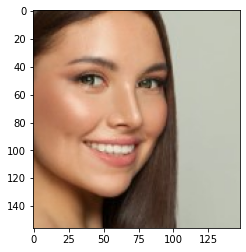

 This image match to PALASH by : 48.69 %
NOT PALASH




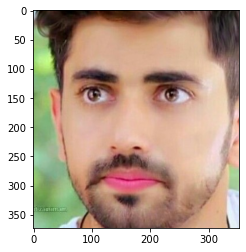

 This image match to PALASH by : 53.26 %
NOT PALASH




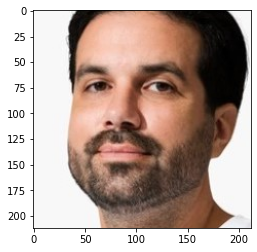

 This image match to PALASH by : 62.82 %
NOT PALASH




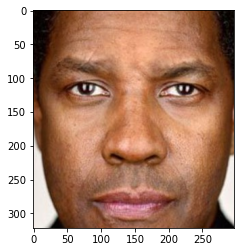

 This image match to PALASH by : 41.8 %
NOT PALASH




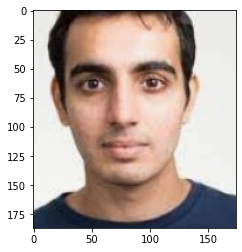

 This image match to PALASH by : 66.19 %
PALASH




In [13]:
#checking for images with NOT PALASH label
for i in range(1,51):
    path = check_path+'NOT PALASH/'+str(i)+'.jpg'
    img  = cv2.imread(path)
    img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img  = face_detector(img)
    plt.imshow(img)
    plt.show()
    x = input_image(img)
    
    input_result = resnet.predict(palash).reshape(1,-1)
    test_result = resnet.predict(x).reshape(1,-1)
    result = metrics.pairwise.cosine_similarity(input_result,test_result)
    
    print(" This image match to PALASH by : " + str( round( result[0][0]*100,2) ) + " %")
    if( result > 0.65 ):
        test_labels.append("PALASH")
        wrong += 1
        print('\033[1m' + colored( "PALASH" , "green" ) + '\033[0m' + "\n\n")
    else:
        test_labels.append("NOT PALASH")
        print( colored ( "NOT PALASH" , "red")+"\n\n")

## Model Accuracy

In [14]:
print("Model Correct Predictions: "+str( 100-wrong ))
print("Model Wrong Predictions: " + str( wrong ))

Model Correct Predictions: 87
Model Wrong Predictions: 13


Confusion Matrix


<AxesSubplot:>

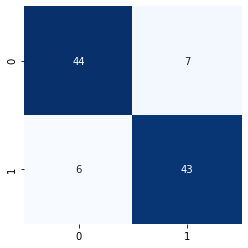

In [15]:
#Making Confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test_labels, actual_labels)
print("Confusion Matrix")
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [16]:
#model accuracy
acc = (100-wrong) /100
print("Accuracy of model is : " + str( acc ))

Accuracy of model is : 0.87


## SAVE THE MODEL

In [17]:
import tensorflow as tf
from keras.models import load_model
resnet.save('facedetection_model.h5')